# Data Augmentation
  
In this notebook we will show different data augmentation techniques on **CIFAR-10 dataset** using pytorch. As you already learned in class, data augmentation is not only a solution when you don't have enough data to train, but also an effective way to improve the generalization performance of your classifier.

Image Augmentation is the process of generating new images for training our deep learning model. These new images are generated using the **existing training images** and hence we don’t have to collect them manually.

**HOWEVER**, these techniques do not come entirely for free. You need to consider the 'safety' of your augmentation. The safety of a Data Augmentation method refers to its likelihood of preserving the label post-transformation. For example, rotations and flips are generally safe on ImageNet challenges such as cat versus dog, but not safe for digit recognition tasks such as 6 versus 9. Besides, some augmentation techniques will increase the computation expensiveness and lead to additional training time. So you need to have this in mind before you apply data augmentation to your dataset.

## When to apply Image Augmentation?

Image data augmentation can be applied as a pre-processing step before we train the model or can be applied in real time.

#### Offline Augmentation

Augmentation is applied as a pre-processing step to increase the size of the dataset. This is usually done when we have a small training dataset that we want to expand. Generating augmentation on smaller dataset is helpful but we need to consider the disk space when applying on larger datasets. In this case, the size of the augmented dataset is fixed.


#### Online Augmentation
As the name suggests, this kind of augmentation is applied in real time. This is usually applied for larger datasets as we do not need to save the augmented images on the disk. In this case, we apply transformations in mini-batches and then feed it to the model. So the size of the augmented dataset that the model actually sees can be infinitly large.

In online augmentation, the model will see different images at each epoch. In offline augmentation, the augmented images are part of the training set, so it views the augmented image multiple times depending on the number of epochs. Hence, the model could generalize better with online augmentation as it sees more samples during training with online data augmentation.

## Data Augmentation Techniques

Since we will work on the CIFAR-10 dataset, the augmentation techniques mentioned below will work in the context of image classification scenarios.

In the following we will show **center crop, random crops, rotation, shifting, flipping, adding noise, resizing, and changing the brightness/contrast/saturation to the images** that work directly on the image object. Also, we will show other common data processing methods such as **toTensor and normalizaion** which works on the tensors that are transformed from images.

All these techniques are available in pytorch, and if you design your own network in the future, please consider data augmentation as a part of your network design.

## Load an image from CIFAR-10 Dataset

In [2]:
import os
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image


%load_ext autoreload
%autoreload 2
%matplotlib inline
plt.rcParams['figure.figsize'] = (4.8, 4.8) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

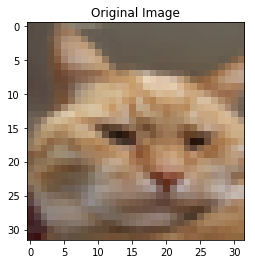

In [3]:
# We will load an image from the cifar-10 dataset that are already used serval times before on your local machine.

original_image = Image.open('../datasets/cifar10/cat/4939.png')
plt.imshow(original_image)
plt.title('Original Image')
plt.show()

### 0.0 ToTensor

The very first thing you need to know is that our network takes **tensors** as input, so one of the most important transformation you need to do is to convert a PIL Image or a numpy.ndarray to tensor before you pass them to your model. You can use

```torchvision.ToTensor()```

which will convert a PIL Image or numpy.ndarray (H x W x C) in the range [0, 255] to a torch.FloatTensor of shape (C x H x W) in the range [0.0, 1.0] if the PIL Image belongs to one of the modes (L, LA, P, I, F, RGB, YCbCr, RGBA, CMYK, 1) or if the numpy.ndarray has dtype = np.uint8.

In the other cases, tensors are returned without scaling.

In [3]:
transform_0 = transforms.ToTensor()
image_transformed_0 = transform_0(original_image)
print("The shape before transformation: ", original_image.size)
print("\nThe shape after transformation: ", image_transformed_0.shape)
print("\nAfter the transformation, the image becomes:\n ", image_transformed_0)

The shape before transformation:  (32, 32)

The shape after transformation:  torch.Size([3, 32, 32])

After the transformation, the image becomes:
  tensor([[[0.3333, 0.3490, 0.3490,  ..., 0.4118, 0.4078, 0.4000],
         [0.3373, 0.3490, 0.3451,  ..., 0.4118, 0.4118, 0.4078],
         [0.3412, 0.3490, 0.3529,  ..., 0.4157, 0.4157, 0.4118],
         ...,
         [0.2471, 0.2706, 0.3686,  ..., 0.6353, 0.6353, 0.6275],
         [0.2706, 0.2706, 0.2824,  ..., 0.5882, 0.6039, 0.6235],
         [0.2275, 0.2196, 0.3412,  ..., 0.5686, 0.5686, 0.5647]],

        [[0.2980, 0.3098, 0.3137,  ..., 0.3882, 0.3843, 0.3765],
         [0.2980, 0.3098, 0.3137,  ..., 0.3843, 0.3843, 0.3804],
         [0.3020, 0.3059, 0.3137,  ..., 0.3765, 0.3765, 0.3765],
         ...,
         [0.1176, 0.1569, 0.2863,  ..., 0.4902, 0.4784, 0.4588],
         [0.1647, 0.1569, 0.1608,  ..., 0.4196, 0.4431, 0.4588],
         [0.0941, 0.0588, 0.1961,  ..., 0.4039, 0.4118, 0.4078]],

        [[0.2627, 0.2706, 0.2784,  ...,

### 0.1 Normalization

This technique is usually applied after the images are tranformed to tensors. Given mean: (M1,...,Mn) and std: (S1,..,Sn) for n channels, 

```torchvision.transforms.Normalize(mean, std, inplace=False)```

will normalize each channel of the input torch.Tensor i.e. *output[channel] = (input[channel] - mean[channel]) / std[channel]*

In [4]:
mean=[0.485, 0.456, 0.406]
std=[0.229, 0.224, 0.225]
transform_01 = transforms.Normalize(mean, std, inplace=False)
image_transformed_01 = transform_01(image_transformed_0)
print("After the normalization, you can see the values of the tensor become: \n", image_transformed_01)

After the normalization, you can see the values of the tensor become: 
 tensor([[[-0.6623, -0.5938, -0.5938,  ..., -0.3198, -0.3369, -0.3712],
         [-0.6452, -0.5938, -0.6109,  ..., -0.3198, -0.3198, -0.3369],
         [-0.6281, -0.5938, -0.5767,  ..., -0.3027, -0.3027, -0.3198],
         ...,
         [-1.0390, -0.9363, -0.5082,  ...,  0.6563,  0.6563,  0.6221],
         [-0.9363, -0.9363, -0.8849,  ...,  0.4508,  0.5193,  0.6049],
         [-1.1247, -1.1589, -0.6281,  ...,  0.3652,  0.3652,  0.3481]],

        [[-0.7052, -0.6527, -0.6352,  ..., -0.3025, -0.3200, -0.3550],
         [-0.7052, -0.6527, -0.6352,  ..., -0.3200, -0.3200, -0.3375],
         [-0.6877, -0.6702, -0.6352,  ..., -0.3550, -0.3550, -0.3550],
         ...,
         [-1.5105, -1.3354, -0.7577,  ...,  0.1527,  0.1001,  0.0126],
         [-1.3004, -1.3354, -1.3179,  ..., -0.1625, -0.0574,  0.0126],
         [-1.6155, -1.7731, -1.1604,  ..., -0.2325, -0.1975, -0.2150]],

        [[-0.6367, -0.6018, -0.5670,  ..., -

### 1. Center Crops

Now, let's talk about what image augmentation techniques that can apply **directly** on the PIL images.

The first one you should know is: center crops.

To crop the given PIL Image at the center. You can use 

```torchvision.transforms.CenterCrop(size)```

**Note:** You need to pass in the desired output size into the transformation.

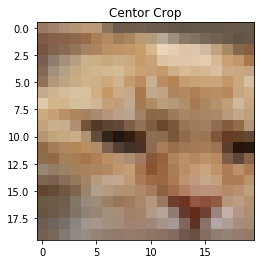

In [41]:
transform_1 = transforms.CenterCrop((20,20))
image_transformed_1 = transform_1(original_image)
plt.imshow(image_transformed_1)
# plt.imshow(original_image)
plt.title('Centor Crop')
plt.show()
# print(image_transformed_1.shape)

### 2. Random Crops

To crop the given PIL Image at a random location, you can use

```torchvision.transforms.RandomCrop(size, padding=None, pad_if_needed=False, fill=0, padding_mode='constant')```

**Note:** You need to pass in the desired output size into the transformation. Other variables are optional.

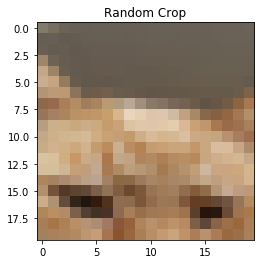

In [49]:
transform_2 = transforms.RandomCrop((20,20))
image_transformed_2 = transform_2(original_image)
plt.imshow(image_transformed_2)
plt.title('Random Crop')
plt.show()

### 3. Random Resized Crops

To crop the given PIL Image to random size and aspect ratio, you can use

```torchvision.transforms.RandomResizedCrop(size, scale=(0.08, 1.0), ratio=(0.75, 1.3333333333333333), interpolation=2)```

**Note:** You need to pass in the desired output size and this crop will finally resized to your given size. This is popularly used to train the Inception networks.

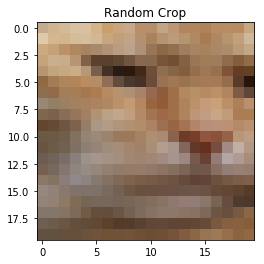

In [53]:
transform_3 = transforms.RandomResizedCrop((20,20))
image_transformed_3 = transform_3(original_image)
plt.imshow(image_transformed_3)
plt.title('Random Crop')
plt.show()

### 4. Rotation

Image rotation is one of the most commonly used augmentation techniques. It can help our model become robust to the changes in the orientation of objects. Even if we rotate the image, the information of the image remains the same. A cat is a cat even if we see it from a different angle.

To rotate the given PIL Image by a given range of degrees, you can use

```torchvision.transforms.RandomRotation(degrees, resample=False, expand=False, center=None, fill=None)``` 

**Note:** If you pass in a number instead of a range, the image will be rotated in a angle from (-degree, +degree).

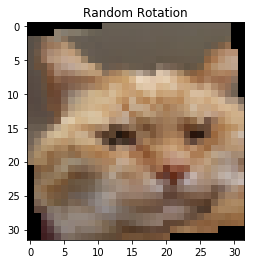

In [13]:
transform_4 = transforms.RandomRotation((-45,45))
image_transformed_4 = transform_4(original_image)
plt.imshow(image_transformed_4)
plt.title('Random Rotation')
plt.show()


### 5. Flipping

We can flip the image horizontally or vertically.

You can use  

```torchvision.transforms.RandomHorizontalFlip()``` or ```torchvision.transforms.RandomVerticalFlip()```

**Note:**

**1.** It takes a float as the input to serve as the probability of the image to be flipped. The default value is 0.5.

**2.** On datasets involving text recognition such as MNIST or SVHN, this is not a label-preserving transformation.

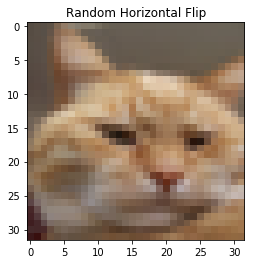

In [69]:
# horizontal flip
transform_5_1 = transforms.RandomHorizontalFlip(p=0.9)
image_transformed_5_1 = transform_5_1(original_image)
plt.imshow(image_transformed_5_1)
plt.title('Random Horizontal Flip')
plt.show()


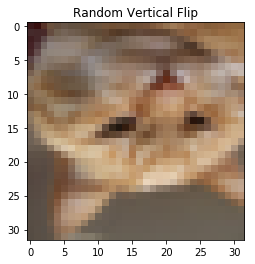

In [22]:
# vertical flip
transform_5_2 = transforms.RandomVerticalFlip(p=0.9)
image_transformed_5_2 = transform_5_2(original_image)
plt.imshow(image_transformed_5_2)
plt.title('Random Vertical Flip')
plt.show()


### 6. Shifting

There might be scenarios when the objects in the image are not perfectly central aligned. In these cases, image shift can be used to add shift-invariance to the images.

By shifting the images, we can change the position of the object in the image and hence give more variety to the model. This will eventually lead to a more generalized model.

To apply random affine transformation to your image, you can use

```torchvision.transforms.RandomAffine(degrees, translate=None, scale=None, shear=None, resample=False, fillcolor=0)```

**Note:** This transformation takes a range of rotation degrees as input, and you can also pass in other parameters such as translate, which is a tuple of maximum absolute fraction for horizontal and vertical translations. 

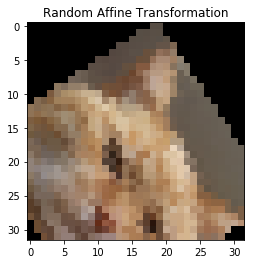

In [77]:
transform_6 = transforms.RandomAffine(degrees=(10,90), translate=(0.1,0.3))
image_transformed_6 = transform_6(original_image)
plt.imshow(image_transformed_6)
plt.title('Random Affine Transformation')
plt.show()



### 7. Adding Gaussian Noise

Adding noise to images is an important augmentation step that allows our model to learn how to separate signal from noise in an image. This also makes the model more robust to changes in the input.

To realize this, you can use

```torchvision.transforms.Lambda(lambd)```

to design your own transform.

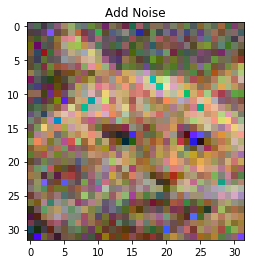

In [80]:
transform_7 = transforms.Compose([transforms.ToTensor(),transforms.Lambda(lambda x : x + 0.1*torch.randn_like(x)),transforms.ToPILImage()])
image_transformed_7 = transform_7(original_image)
plt.imshow(image_transformed_7)
plt.title('Add Noise')
plt.show()

### 8. ColorJitter

To randomly change the brightness, contrast and saturation of an image, you can use

```torchvision.transforms.ColorJitter(brightness=0, contrast=0, saturation=0, hue=0)```

**Note:** All these four arguments take either a float or a tuple as input. And your inputs basically specify a range that the tranformation can apply on.

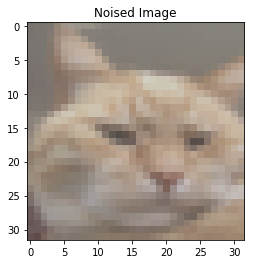

In [84]:
transform_8 = transforms.ColorJitter(brightness=0.3, contrast=0.6, saturation=0.5)
image_transformed_8 = transform_8(original_image)
plt.imshow(image_transformed_8)
plt.title('Noised Image')
plt.show()


### 9. Resizing

Because our model takes a certain input size, so sometimes we need to resize our images.

To resize the input PIL Image to the given size, you can use

```torchvision.transforms.Resize(size, interpolation=2)``` 

**Note:** you need to pass in the desired output size. If size is a sequence like (h, w), output size will be matched to this.

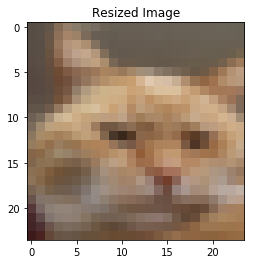

In [88]:
transform_9 = transforms.Resize((24,24))
image_transformed_9 = transform_9(original_image)
plt.imshow(image_transformed_9)
plt.title('Resized Image')
plt.show()

## 10. Combine All These Together

All these mentioned above are widely used in network design, and you can combine them by using

```torchvision.transforms.Compose(transforms)```

This can composes several transforms together.

In [31]:
transform = transforms.Compose([
    transforms.CenterCrop((20,20)),
    transforms.ColorJitter(brightness=0.3, contrast=0.6, saturation=0.5),
    transforms.RandomAffine(degrees=(10,90), translate=(0.1,0.3)),
    transforms.ToTensor(),
    transforms.Normalize(mean, std, inplace=False)
])
image_transformed = transform(original_image)

**If you want to learn more about data augmentation using Pytorch, you can check it out the documentation below.**

In [32]:
from IPython.display import IFrame
IFrame('https://pytorch.org/docs/stable/torchvision/transforms.html', width=900, height=400)